In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Loading Dataset

In [2]:
import pandas as pd

# Provide the complete file path including the file name and extension
file_path = r"C:\Users\ssoni\Downloads\Nirnaya\Dataset\Crop_recommendation.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
X = df.drop(['label'], axis=1)
y = df.label
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
# missing data
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## Exploratory Data Analysis

In [4]:
# Summary statistics for numerical columns
print(df.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


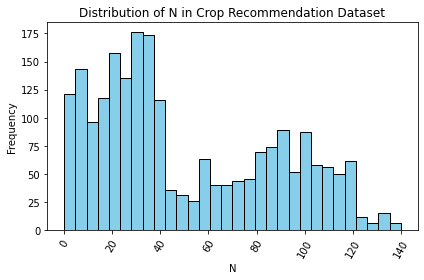

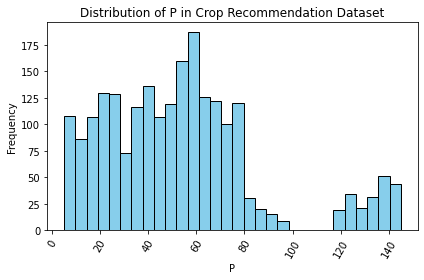

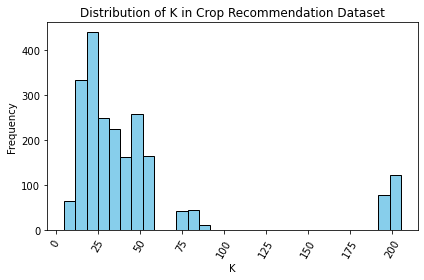

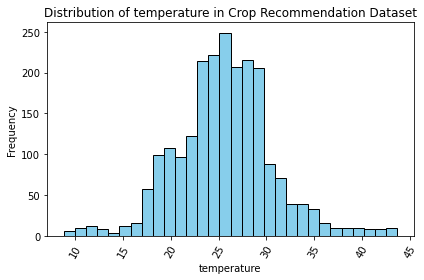

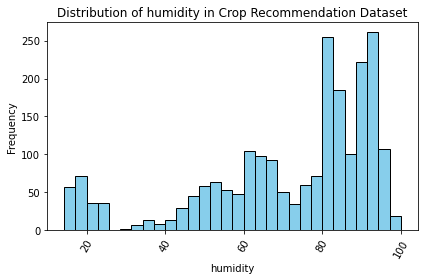

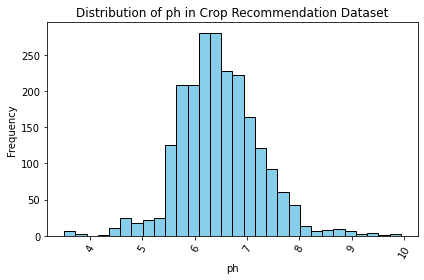

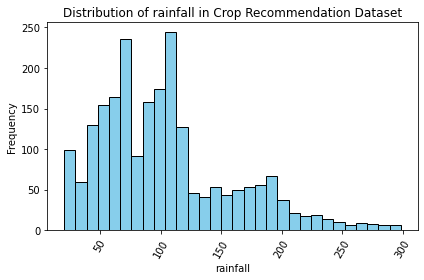

In [21]:
def create_histogram(column_name, bins=30, color='skyblue', edgecolor='black'):
  plt.hist(df[column_name], bins=bins, color=color, edgecolor=edgecolor)
  plt.xlabel(column_name)
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {column_name} in Crop Recommendation Dataset")
  plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
  plt.tight_layout()
  plt.show()

# Create histograms for each numerical column with unique styles
for col in df.select_dtypes(include=[np.number]):
  create_histogram(col)

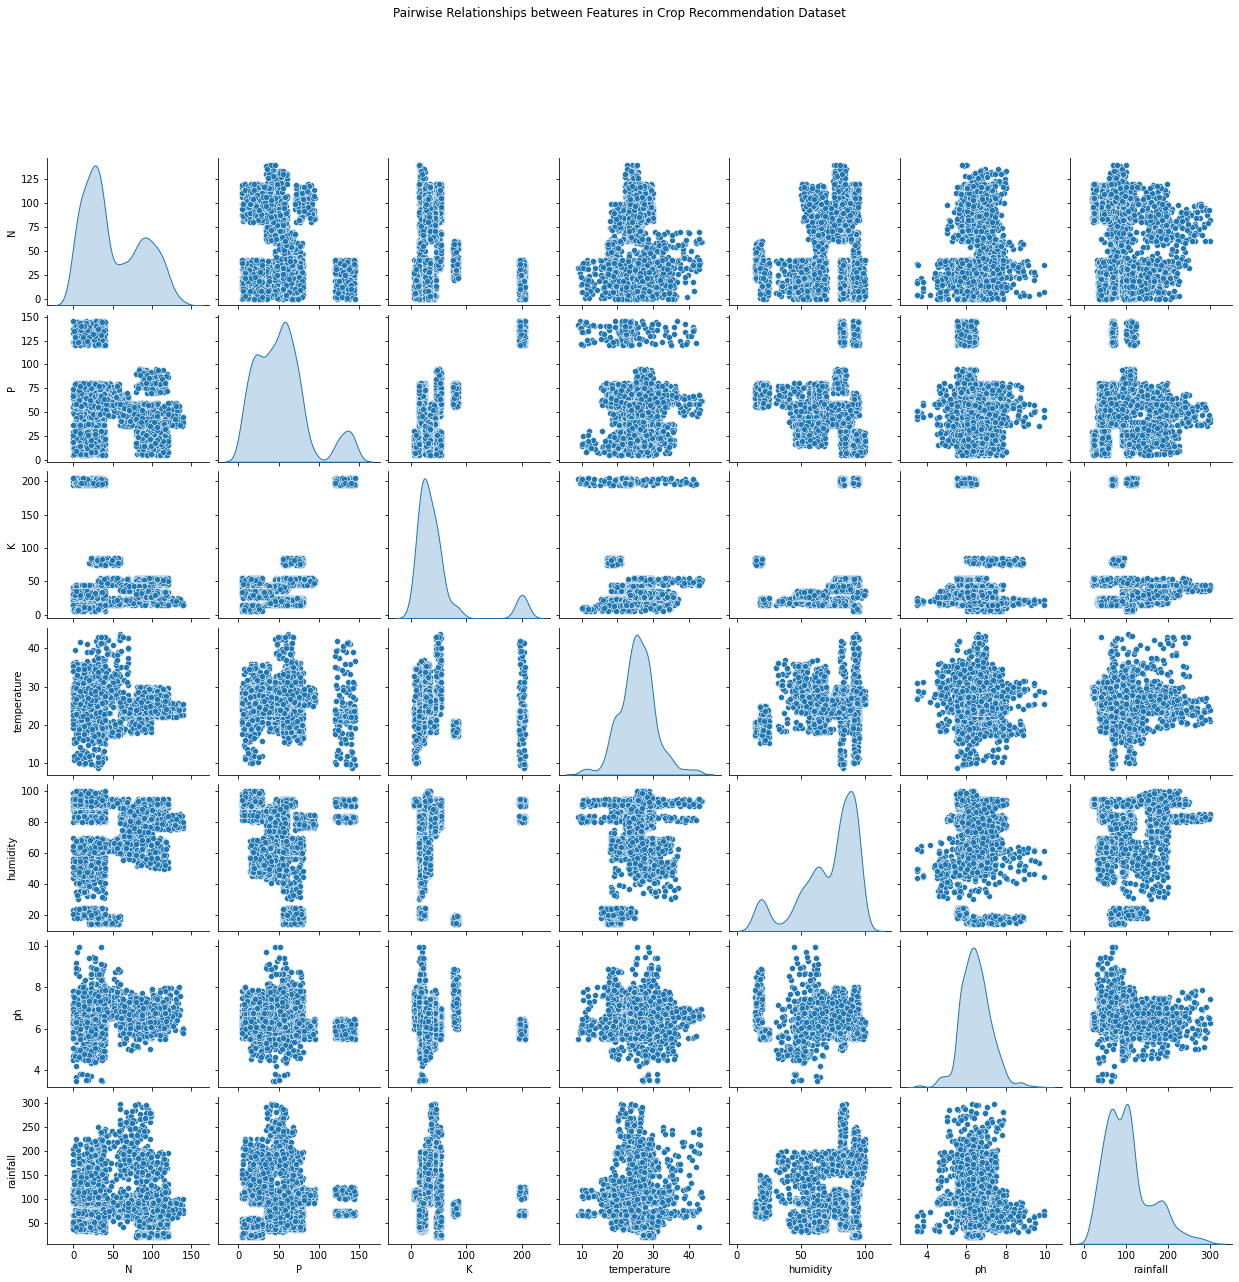

In [23]:
g = sns.pairplot(df, diag_kind="kde", palette="coolwarm")
g.fig.suptitle("Pairwise Relationships between Features in Crop Recommendation Dataset", y=1.02)
g.fig.subplots_adjust(top=0.9)  # Adjust spacing 

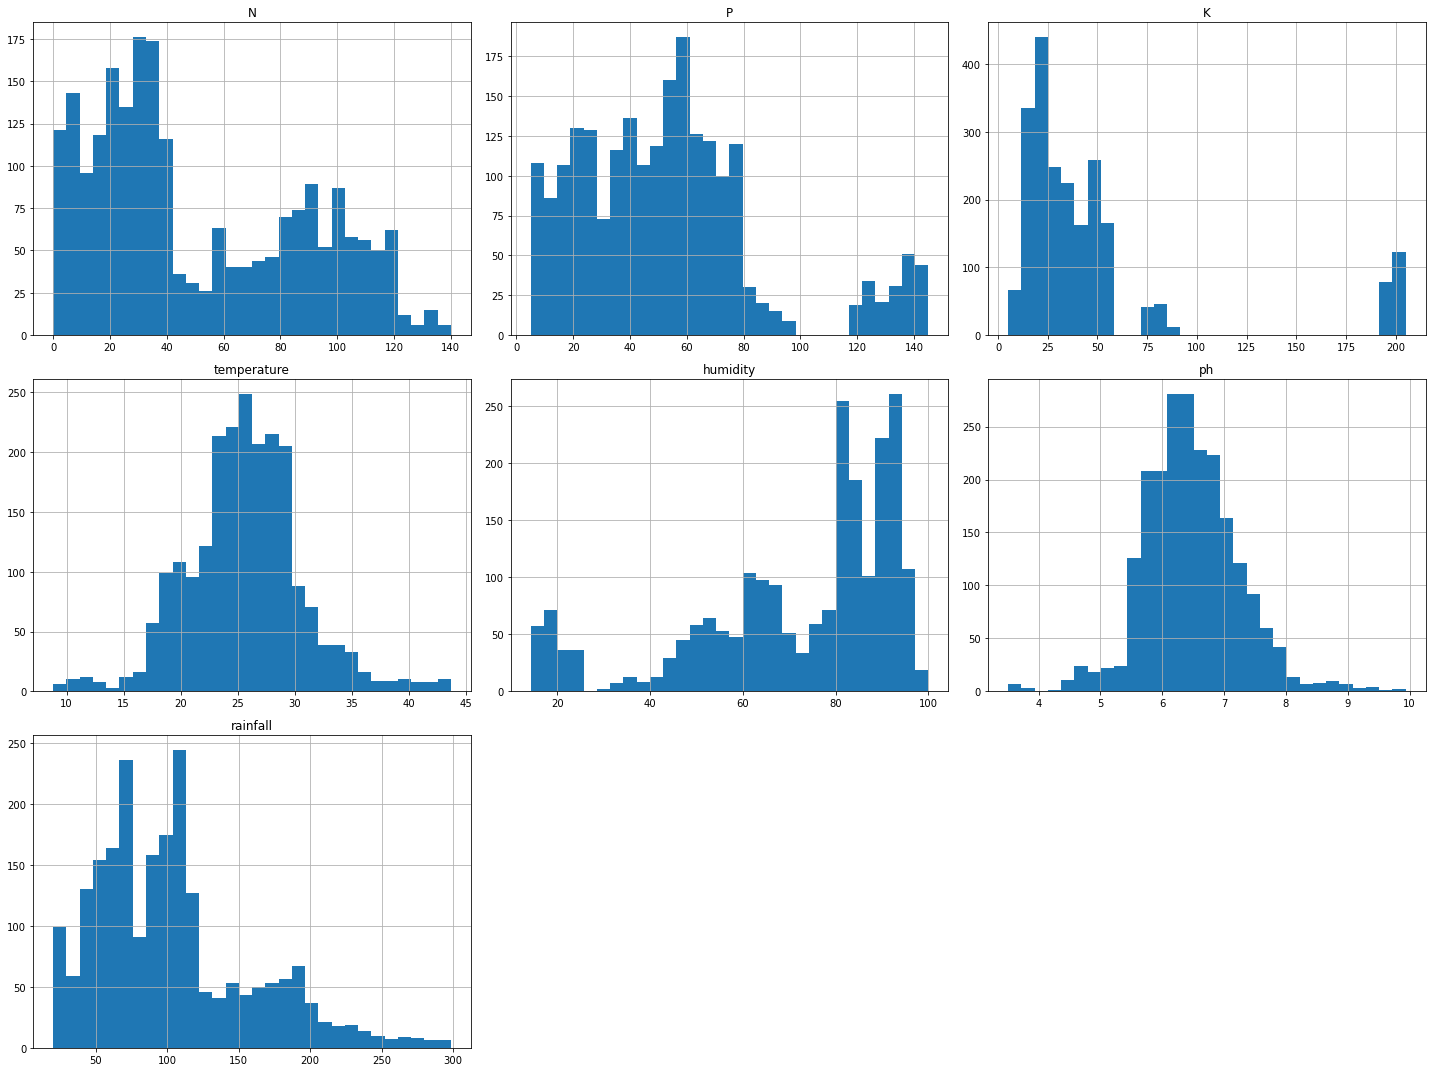

In [8]:
df.hist(bins=30, figsize=(20, 15))
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.title("Distribution of Numerical Features in Crop Recommendation Dataset")
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


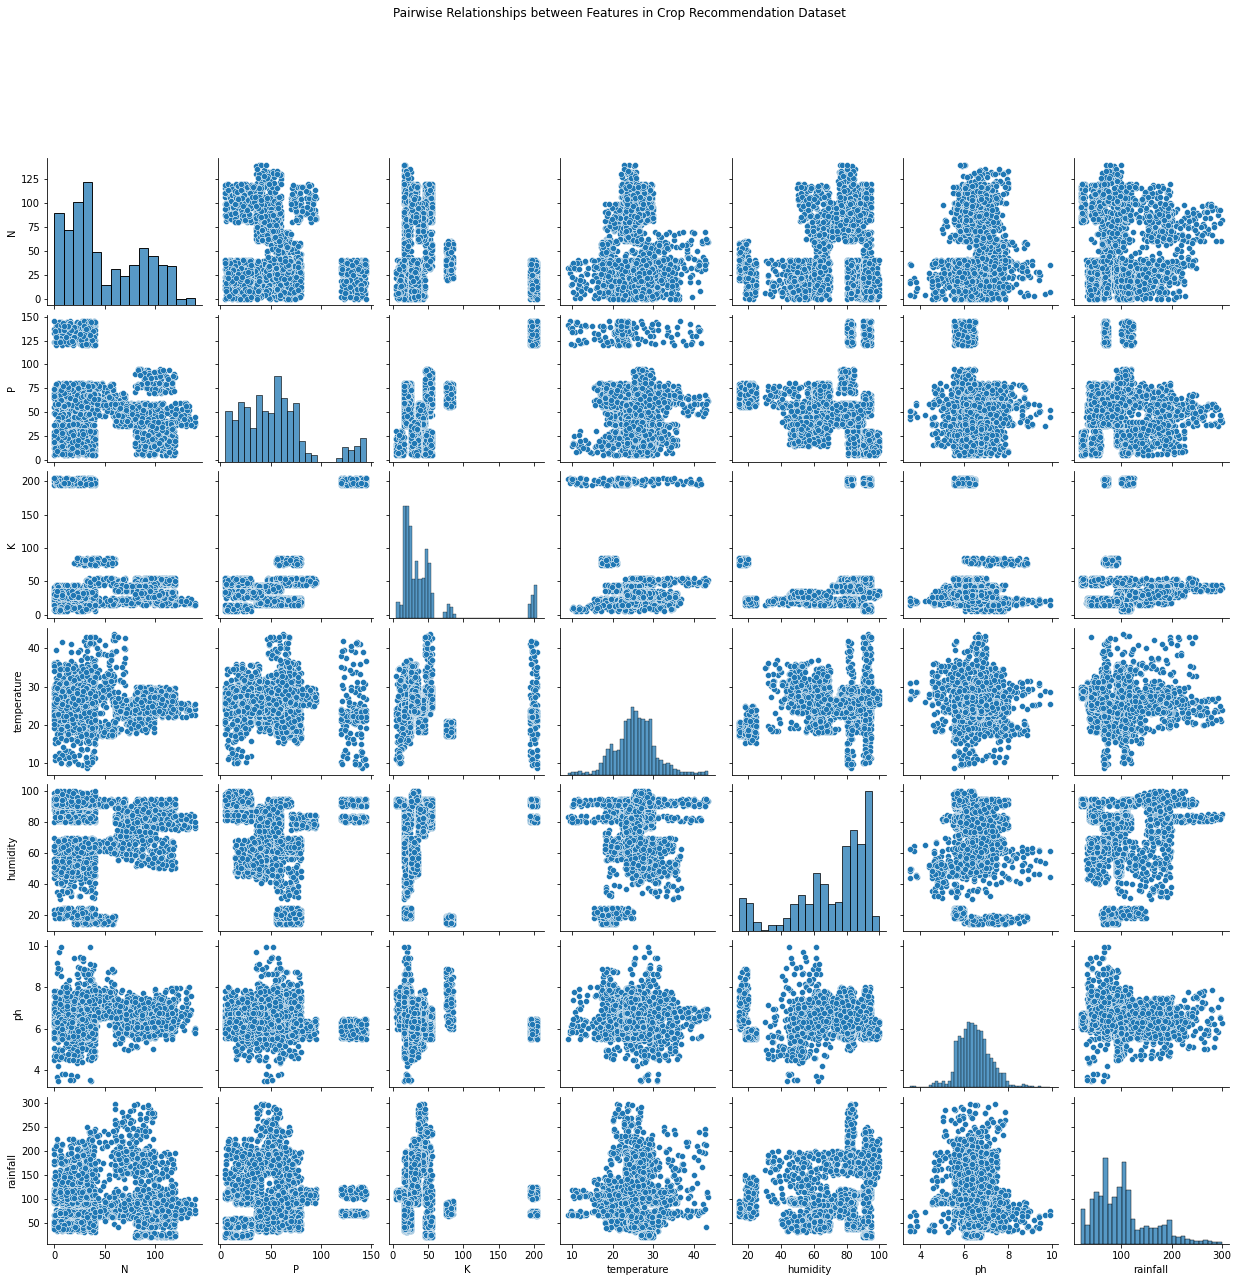

In [10]:
sns.pairplot(df)
plt.suptitle("Pairwise Relationships between Features in Crop Recommendation Dataset", y=1.02)  # Add title above the plots
plt.subplots_adjust(top=0.9)

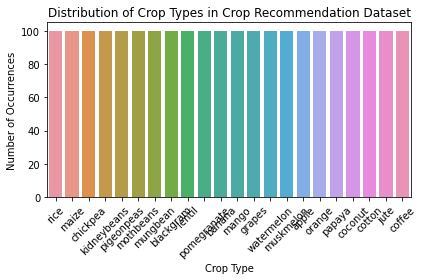

In [11]:
sns.countplot(x="label", data=df)
plt.xlabel("Crop Type")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of Crop Types in Crop Recommendation Dataset")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## List of crops

In [9]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

## Data Preprocessing

In [10]:
# data preprocessing
from sklearn.preprocessing import StandardScaler

X_standardized = X.copy()
for col in X_standardized.columns:
    X_standardized[col] = StandardScaler().fit_transform(X_standardized[col].values.reshape(-1, 1))
    
X_standardized.head()

,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373


## Splitting the data

In [11]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, train_size=0.8, random_state=42)

## SVM

In [12]:
from sklearn.svm import SVC
from sklearn import metrics
svc = SVC(kernel='linear') # Linear Kernel
y_pred = svc.fit(X_train, y_train).predict(X_test)

svc_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", svc_accuracy)

Accuracy: 0.9772727272727273


In [13]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test),metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.98        21
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      0.94      0.97        18
      grapes       1.00      1.00      1.00        14
        jute       0.96      0.85      0.90        26
 kidneybeans       1.00      0.91      0.95        22
      lentil       1.00      0.92      0.96        12
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        19
   mothbeans       0.96      1.00      0.98        23
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [14]:
import joblib
  
#saving the model as pickle file soil_crop.pkl  

joblib.dump(svc, 'soil_crop.pkl')

['soil_crop.pkl']

## KNN - Most suitable crop and List of Crops

In [15]:
dataset = df.to_numpy()
print(len(dataset))
test = [[45,24,32,45,52,5.9,95]]
test = test[0]
print(test)

2200
[45, 24, 32, 45, 52, 5.9, 95]


In [16]:
from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    #print(distances)
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors
 
neighbors = get_neighbors(dataset, test, 100)
pred=[]
for neighbor in neighbors:
    pred.append(neighbor[-1])

## Most suitable crop

In [17]:
# x = np.array(pred)
print(max(set(pred), key = pred.count))

mango


## List of crops

In [18]:
np.unique(pred).tolist()

['maize', 'mango', 'mothbeans']